This code performs linear regression on a given set of training data, and then applies the trained model to predict outcomes on a separate set of test data.

The first few lines import necessary libraries - csv for reading the training and test data, numpy for array operations, and matplotlib.pyplot for data visualization.

In [202]:
import csv
import numpy as np
import matplotlib.pyplot as plt

The read_csv_file function reads a csv file from a given path, skips the header row, and returns the data as a list of lists. Each sublist contains the float values from the second column until the last column in each row.

In [203]:
def read_csv_file(path):
    with open(path) as file:
        next(csv.reader(file)) # skip the header row
        return [list(map(float, row[1:])) for row in csv.reader(file)]

The linear_regression function takes in the coefficients of the linear regression model (beta0 and beta1) and a value of x, and returns the predicted y value based on the equation y = beta0 + beta1*x.

In [204]:
def linear_regression(beta0, beta1, x):
    return beta0 + beta1 * x

The calculate_loss function takes in the predicted and actual y values, and calculates the mean squared error loss between them.

In [205]:
def calculate_loss(predicted, actual):
    return np.mean((np.array(predicted) - np.array(actual)) ** 2)

The train_model function takes in the training data, as well as optional parameters for tolerance and learning rate. It initializes beta0 and beta1 with random values, extracts x and y values from the training data, calculates initial predicted y values and loss, and then continues training the model until convergence criteria is met. The convergence criteria is defined by the tolerance parameter, which specifies the minimum change in loss required to continue training. During each epoch, the derivatives of the loss function with respect to beta0 and beta1 are calculated, beta0 and beta1 are updated using the learning rate and the calculated derivatives, new predicted y values and loss are calculated, and the change in loss from the previous epoch is calculated. The final values of beta0 and beta1 are returned as a dictionary.

In [207]:
def train_model(rows, tolerance=0.0001, learning_rate=0.01):
    
    # Initialize beta0 and beta1 with random values
    beta0, beta1 = np.random.randn(), np.random.randn()
    
    # Extract x and y values from the training data
    x_values, y_values = np.array(rows)[:, 0].astype(float), np.array(rows)[:, 1].astype(float)

    # Calculate initial predicted y values and loss
    predicted_y = linear_regression(beta0, beta1, x_values)
    loss_val = calculate_loss(predicted_y, y_values)

    # Initialize delta and epoch number
    delta = 100
    epoch_number = 0

    # Continue training until convergence criteria is met
    while tolerance < delta:
        
        # Calculate derivatives of the loss function with respect to beta0 and beta1
        diff_y_values = y_values - predicted_y
        derivative_beta0 = - (2 / len(diff_y_values)) * np.sum(diff_y_values)
        derivative_beta1 = - (2 / len(diff_y_values)) * np.sum(np.multiply(diff_y_values, x_values))

        # Update beta0 and beta1 using the learning rate and the calculated derivatives
        beta0 -= learning_rate * derivative_beta0
        beta1 -= learning_rate * derivative_beta1

        # Calculate new predicted y values and loss
        predicted_y = linear_regression(beta0, beta1, x_values)
        current_loss = calculate_loss(predicted_y, y_values)

        # Calculate the change in loss from the previous epoch
        delta, loss_val, epoch_number = loss_val - current_loss, current_loss, epoch_number + 1

        # Print the current epoch number, loss, and values of beta0 and beta1
        print(f'Epoch {epoch_number}, Loss: {loss_val}')
        print(f'Beta0 = {beta0}; Beta1 = {beta1}')
        print('------------------')

    # Return the final values of beta0 and beta1
    return {"beta0": beta0, "beta1": beta1}

The main part of the program.

The next few lines load the training data, visualize it using matplotlib, and then call the train_model function on the training data to get the final values of beta0 and beta1.

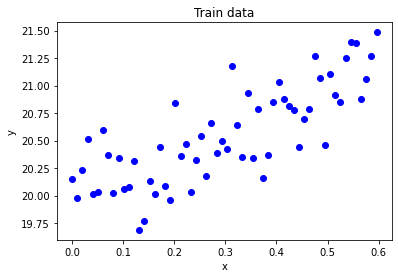

In [208]:
# Load training data and visualize it
train_rows = read_csv_file(r'C:\Users\Anna\Downloads\lab_1_train.csv')
x_train, y_train = zip(*train_rows)
plt.title("Train data")
plt.plot(x_train, y_train, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [209]:
# Train the model and get beta0 and beta1 values
beta_values = train_model(train_rows)

Epoch 1, Loss: 345.9921287976046
Beta0 = 2.1377721231446767; Beta1 = -0.6094294595157782
------------------
Epoch 2, Loss: 331.0650458244955
Beta0 = 2.509639897847141; Beta1 = -0.49703635587209577
------------------
Epoch 3, Loss: 316.7824702118511
Beta0 = 2.8734004995691946; Beta1 = -0.387127811966125
------------------
Epoch 4, Loss: 303.1165736148714
Beta0 = 3.2292308787426203; Beta1 = -0.27964957956263337
------------------
Epoch 5, Loss: 290.040729253123
Beta0 = 3.577304123493001; Beta1 = -0.1745485945162008
------------------
Epoch 6, Loss: 277.5294600297328
Beta0 = 3.9177895439425416; Beta1 = -0.07177295092600466
------------------
Epoch 7, Loss: 265.55838889067786
Beta0 = 4.250852754672807; Beta1 = 0.028728124145270206
------------------
Epoch 8, Loss: 254.10419132744738
Beta0 = 4.576655755387537; Beta1 = 0.12700429540070937
------------------
Epoch 9, Loss: 243.14454993053062
Beta0 = 4.895357009814834; Beta1 = 0.2231041434986787
------------------
Epoch 10, Loss: 232.658110905

The following lines load the test data, visualize it using matplotlib, and plot the regression line connecting the points (0, f(0)) and (1, f(1)) on a plot with the training data as blue circles and the test data as red circles.

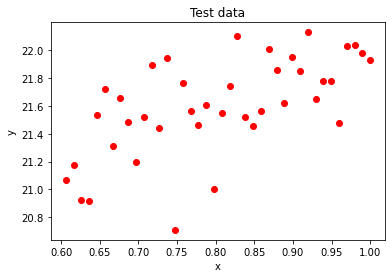

In [210]:
# Load test data and visualize it
test_rows = read_csv_file(r'C:\Users\Anna\Downloads\lab_1_test.csv')
x_test, y_test = zip(*test_rows)
plt.title("Test data")
plt.plot(x_test, y_test, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

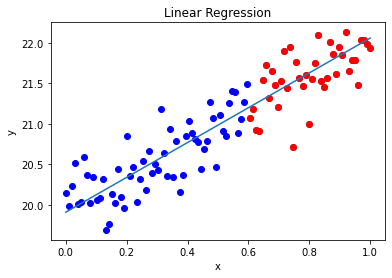

In [211]:
# Plot the regression line
# Plot the training data as blue circles
# and the testing data as red circles
# and the regression line as a solid line 
# connecting the points (0, f(0)) and (1, f(1))
plt.plot(
    x_train, y_train, 'bo', # training data
    x_test, y_test, 'ro', # testing data
    [0, 1], # x values for regression line
    [
        linear_regression(beta_object["beta0"], beta_object["beta1"], 0), # y value at x=0
        linear_regression(beta_object["beta0"], beta_object["beta1"], 1) # y value at x=1
    ]
)
plt.scatter(x_test, y_test)
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")

# Display the plot
plt.show()

The linear_regression function is used to make predictions on the test data, and the calculate_loss function is used to calculate the loss between the predicted and actual y values on the test data. The loss is printed to the console as output.

In [212]:
# Make predictions on the test data
predicted = [linear_regression(beta_object["beta0"], beta_object["beta1"], x) for x in x_test]

# Calculate the loss on the test data
loss = calculate_loss(predicted, y_test)
print(f"The loss on the test data: {loss}")

The loss on the test data: 0.07538328379506022
